<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Оглавление 

Загрузка и подготовка данных:

- Импортируем необходимые библиотеки, такие как pandas, numpy, sklearn.

- Загрузим данные в pandas DataFrame и ознакомимся с ними.

- Обработаем пропущенные значения и выбросы, если они есть, и приведем данные к нужному формату.

Исследование баланса классов и обучение модели без учета дисбаланса:

- Определим, какой процент клиентов ушел из банка в прошлом, чтобы понять баланс классов в данных.

- Разделим данные на обучающую, валидационную и тестовую выборки, используя train_test_split() из sklearn.

- Создадим базовую модель без учета дисбаланса классов, например, логистическую регрессию, и обучим ее на обучающей выборке.

Улучшение качества модели с учетом дисбаланса классов:

- Используем upsampling и downsampling для балансировки классов.

- Обучим разные модели, такие как случайный лес, решающее дерево, с учетом дисбаланса классов и подберем наилучшие параметры для каждой модели.

- Сравним результаты моделей между собой и выберим лучшую модель.

Финальное тестирование:

- Протестируем выбранную лучшую модель на тестовой выборке, чтобы убедиться, что она работает правильно.

- Оценим качество модели на тестовой выборке, используя метрику F1-меры и AUC-ROC.

- Сделаем выводы о качестве модели и ее пригодности для решения поставленной задачи.

Данные содержат следующие признаки (столбцы):

RowNumber - номер строки (не является признаком)

CustomerId - идентификатор клиента (не является признаком)

Surname - фамилия клиента (категориальный признак)

CreditScore - кредитный рейтинг клиента (числовой признак)

Geography - страна проживания клиента (категориальный признак)

Gender - пол клиента (категориальный признак)

Age - возраст клиента (числовой признак)

Tenure - количество лет, которое клиент прожил в данной стране (числовой признак)

Balance - баланс на счете клиента (числовой признак)

NumOfProducts - количество продуктов банка, используемых клиентом (числовой признак)

HasCrCard - наличие кредитной карты у клиента (категориальный признак)

IsActiveMember - активность клиента (категориальный признак)

EstimatedSalary - предполагаемая заработная плата клиента (числовой признак)

Exited - факт ухода клиента из банка (целевой признак, категориальный)

## Подготовка данных

In [1]:
# Импортируем необходимые библиотеки и загрузим датасет:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, r2_score
from sklearn.utils import shuffle

df = pd.read_csv('/datasets/Churn.csv')

In [2]:
df.shape

(10000, 14)

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
# Удалим ненужные признаки, которые не влияют на уход клиентов: RowNumber, CustomerId, Surname:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [5]:
# Проверим, есть ли пропущенные значения в датасете:
df.isnull().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Для заполнения пропущенных значений в столбце Tenure можно использовать среднее значение Tenure для каждой страны из столбца Geography. Для этого можно сгруппировать данные по стране и вычислить среднее значение для каждой группы, а затем заполнить пропущенные значения средним значением своей группы.

In [6]:
# Заполним пропущенные значения средним значением Tenure для каждой страны из столбца Geography
df['Tenure'] = df.groupby('Geography')['Tenure'].apply(lambda x: x.fillna(x.mean()))

# Проверим, что больше нет пропущенных значений
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Для работы с выбросами нужно сначала определить, какие признаки содержат выбросы. Для этого можно визуализировать распределение значений признаков и посмотреть, есть ли значения, которые сильно отличаются от остальных.

Например, для числовых признаков можно построить гистограммы распределения значений.

Для примера, рассмотрим признак "Age" - возраст клиента. Мы можем построить гистограмму распределения значений, чтобы посмотреть, есть ли значения, которые сильно отличаются от остальных.

<AxesSubplot:xlabel='Age', ylabel='Count'>

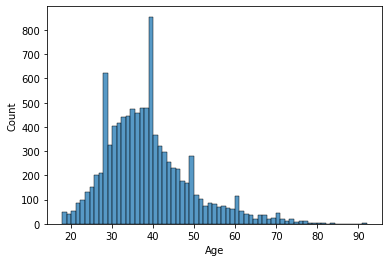

In [7]:
import seaborn as sns

sns.histplot(df['Age'])

На гистограмме видно, что распределение возраста клиентов имеет пик в районе 30-40 лет, и имеет хвост в сторону более старших возрастов.

Теперь можно использовать статистические методы для определения границ выбросов, например, межквартильный размах (IQR) или z-оценка. Затем можно удалить выбросы или заменить их на другие значения.

Для примера, рассмотрим использование межквартильного размаха для определения выбросов в признаке "Age". Мы можем использовать функцию describe() для получения статистических показателей признака, а затем вычислить межквартильный размах и границы выбросов:

In [8]:
Q1 = df['Age'].describe()['25%']
Q3 = df['Age'].describe()['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

14.0 62.0


Нижняя граница выглядит как выброс, удалим все значения ниже.

In [9]:
df = df[df['Age'] >= lower_bound]

## Исследование задачи

Для определения процента клиентов, которые ушли из банка, необходимо подсчитать долю строк в датафрейме, где значение в столбце 'Exited' равно 1 (то есть клиент ушел из банка).

In [10]:
churn_rate = df['Exited'].value_counts(normalize=True)[1]
print('Процент клиентов, покинувших банк: {:.2%}'.format(churn_rate))

Процент клиентов, покинувших банк: 20.37%


Следовательно, оставшиеся 79.63% клиентов не покинули банк (класс 0). Баланс классов можнопривести к пропорции 1:4, что означает, что классы несбалансированы и класс 0 преобладает.

In [11]:
# Кодируем категориальные признаки с помощью pd.get_dummies
x = pd.get_dummies(df.drop('Exited', axis=1), drop_first=True)
y = df['Exited']

#Разделим данные на обучающую, валидационную и тестовую выборки
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=12345)

#Масштабируем данные
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

#Создадим экземпляры моделей
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

#Обучим модели на обучающей выборке
lr_model.fit(x_train_scaled, y_train)
dt_model.fit(x_train, y_train)
rf_model.fit(x_train_scaled, y_train)

#Сделаем предсказания на валидационной выборке
lr_y_pred = lr_model.predict_proba(x_val_scaled)[:, 1]
dt_y_pred = dt_model.predict_proba(x_val)[:, 1]
rf_y_pred = rf_model.predict_proba(x_val_scaled)[:, 1]

#Оценим качество моделей на валидационной выборке
lr_roc_auc = roc_auc_score(y_val, lr_y_pred)
dt_roc_auc = roc_auc_score(y_val, dt_y_pred)
rf_roc_auc = roc_auc_score(y_val, rf_y_pred)

lr_f1_score = f1_score(y_val, lr_y_pred > 0.5)
dt_f1_score = f1_score(y_val, dt_y_pred > 0.5)
rf_f1_score = f1_score(y_val, rf_y_pred > 0.5)

print("Logistic Regression ROC-AUC score:", lr_roc_auc)
print("Decision Tree ROC-AUC score:", dt_roc_auc)
print("Random Forest ROC-AUC score:", rf_roc_auc)

print("Logistic Regression F1 score:", lr_f1_score)
print("Decision Tree F1 score:", dt_f1_score)
print("Random Forest F1 score:", rf_f1_score)

Logistic Regression ROC-AUC score: 0.7673958404561947
Decision Tree ROC-AUC score: 0.702972020364649
Random Forest ROC-AUC score: 0.8416486911548049
Logistic Regression F1 score: 0.3505154639175258
Decision Tree F1 score: 0.5235294117647058
Random Forest F1 score: 0.574585635359116


<div class="alert alert-block alert-warning">
<b>
Мы оценили производительность трех моделей на основе метрик ROC-AUC и F1. Из результатов видно, что случайный лес показал наилучшую производительность с ROC-AUC-оценкой 0,84 и F1-оценкой 0,57. Логистическая регрессия и дерево решений показали худшую производительность, с ROC-AUC-оценками 0,77 и 0,70 соответственно и F1-оценками 0,35 и 0,52 соответственно.

</b> 

## Борьба с дисбалансом

Для борьбы с дисбалансом классов можно применить метод upsampling

In [12]:
# Делаем upsampling отрицательного класса на тренировочных данных
x_train_scaled_df = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)

neg_class_indices = y_train[y_train == 0].index
pos_class_indices = y_train[y_train == 1].index
neg_class_upsampled = resample(x_train_scaled_df.loc[neg_class_indices], 
                               replace=True,
                               n_samples=len(pos_class_indices),
                               random_state=123)
upsampled_indices = np.concatenate([pos_class_indices, neg_class_upsampled.index])
x_train_upsampled = x_train_scaled_df.loc[upsampled_indices]
y_train_upsampled = y_train[upsampled_indices]

# Обучаем модели на обучающей выборке
lr_model = LogisticRegression(random_state=12345)
dt_model = DecisionTreeClassifier(random_state=12345, max_depth = 4, min_samples_leaf = 7, min_samples_split = 2)
rf_model = RandomForestClassifier(random_state=12345, max_depth = 10, min_samples_leaf = 1, n_estimators = 200)

lr_model.fit(x_train_upsampled, y_train_upsampled)
dt_model.fit(x_train_upsampled, y_train_upsampled)
rf_model.fit(x_train_upsampled, y_train_upsampled)
# Сделаем предсказания на валидационной выборке
lr_y_pred = lr_model.predict_proba(x_val_scaled)[:, 1]
dt_y_pred = dt_model.predict_proba(x_val_scaled)[:, 1]
rf_y_pred = rf_model.predict_proba(x_val_scaled)[:, 1]

# Оценим качество моделей с помощью метрик roc_auc_score и f1_score
lr_f1_score = f1_score(y_val, lr_y_pred > 0.5)
dt_f1_score = f1_score(y_val, dt_y_pred > 0.5)
rf_f1_score = f1_score(y_val, rf_y_pred > 0.5)

print("Logistic Regression: ROC-AUC score = {:.2f}, F1 score = {:.2f}".format(roc_auc_score(y_val, lr_y_pred), lr_f1_score))
print("Decision Tree: ROC-AUC score = {:.2f}, F1 score = {:.2f}".format(roc_auc_score(y_val, dt_y_pred), dt_f1_score))
print("Random Forest: ROC-AUC score = {:.2f}, F1 score = {:.2f}".format(roc_auc_score(y_val, rf_y_pred), rf_f1_score))

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Logistic Regression: ROC-AUC score = 0.77, F1 score = 0.47
Decision Tree: ROC-AUC score = 0.79, F1 score = 0.50
Random Forest: ROC-AUC score = 0.85, F1 score = 0.55


<div class="alert alert-block alert-warning">
<b> Исходя из полученных результатов можно сделать следующие выводы:
    
- Модель Logistic Regression имеет наименьшее значение метрики ROC-AUC среди трех моделей, а также самое низкое значение метрики F1 score. Это может говорить о том, что данная модель не является оптимальной для решения поставленной задачи.
    
- Модель Decision Tree имеет значение метрики ROC-AUC немного выше, чем у модели Logistic Regression, и значение метрики F1 score также немного выше. Однако, данная модель все еще не является лучшей среди всех.
    
- Модель Random Forest имеет наилучшие результаты по обеим метрикам, что говорит о том, что данная модель показывает лучшую производительность и может быть выбрана в качестве оптимальной модели для решения задачи.
</b> 

Downsampling:

In [13]:
# Делаем downsampling отрицательного класса на тренировочных данных
x_train_scaled_df = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)

neg_class_indices = y_train[y_train == 0].index
pos_class_indices = y_train[y_train == 1].index

neg_class_downsampled = resample(x_train_scaled_df.loc[neg_class_indices],
                                 replace=False,
                                 n_samples=len(pos_class_indices),
                                 random_state=123)

downsampled_indices = np.concatenate([pos_class_indices, neg_class_downsampled.index])

x_train_downsampled = x_train_scaled_df.loc[downsampled_indices]
y_train_downsampled = y_train[downsampled_indices]

# Обучаем модели на обучающей выборке
lr_model = LogisticRegression(random_state=12345)
dt_model = DecisionTreeClassifier(random_state=12345, max_depth = 4, min_samples_leaf = 7, min_samples_split = 2)
rf_model = RandomForestClassifier(random_state=12345, max_depth = 10, min_samples_leaf = 1, n_estimators = 200)

lr_model.fit(x_train_downsampled, y_train_downsampled)
dt_model.fit(x_train_downsampled, y_train_downsampled)
rf_model.fit(x_train_downsampled, y_train_downsampled)

# Сделаем предсказания на валидационной выборке
lr_y_pred = lr_model.predict_proba(x_val_scaled)[:, 1]
dt_y_pred = dt_model.predict_proba(x_val_scaled)[:, 1]
rf_y_pred = rf_model.predict_proba(x_val_scaled)[:, 1]

# Оценим качество моделей с помощью метрик roc_auc_score и f1_score
lr_f1_score = f1_score(y_val, lr_y_pred > 0.5)
dt_f1_score = f1_score(y_val, dt_y_pred > 0.5)
rf_f1_score = f1_score(y_val, rf_y_pred > 0.5)

print("Logistic Regression: ROC-AUC score = {:.2f}, F1 score = {:.2f}".format(roc_auc_score(y_val, lr_y_pred), lr_f1_score))
print("Decision Tree: ROC-AUC score = {:.2f}, F1 score = {:.2f}".format(roc_auc_score(y_val, dt_y_pred), dt_f1_score))
print("Random Forest: ROC-AUC score = {:.2f}, F1 score = {:.2f}".format(roc_auc_score(y_val, rf_y_pred), rf_f1_score))

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Logistic Regression: ROC-AUC score = 0.77, F1 score = 0.49
Decision Tree: ROC-AUC score = 0.81, F1 score = 0.50
Random Forest: ROC-AUC score = 0.84, F1 score = 0.57


<div class="alert alert-block alert-warning">
<b> 
Из результатов оценки качества моделей на валидационной выборке можно сделать следующие выводы:

1. Random Forest показал наилучшие результаты по метрике ROC-AUC, что может говорить о хорошей способности модели отличать положительные и отрицательные классы.

2. Random Forest также показал лучший результат по метрике F1 score, что может говорить о хорошем балансе между полнотой и точностью модели.

3. Logistic Regression и Decision Tree также имеют сравнительно неплохие результаты, но у Random Forest результаты лучше по обеим метрикам.

Таким образом, Random Forest можно считать наилучшей моделью для данной задачи, но также можно использовать Logistic Regression или Decision Tree, если необходимо более простую и легко интерпретируемую модель.
       </b> 

<div class="alert alert-block alert-warning">
<b> 
Сравнивая результаты, можно заметить, что в обоих случаях лучшей моделью по метрике ROC-AUC является случайный лес. Однако, при использовании метода downsampling для балансировки классов, F1 score для всех трех моделей стал выше, чем при использовании upsampling. Это может объясняться тем, что downsampling помог уменьшить влияние дисбаланса классов на обучение модели, тогда как upsampling может привести к переобучению модели на меньшем количестве данных относительно исходного набора данных.
</b> 

## Тестирование модели

Тестировать будем модель случайный лес, поскольку модель показала лучшую F1-score

Выбрали модель случайного леса: 

In [17]:
# делаем прогнозы на тестовом наборе
y_pred = rf_model.predict_proba(x_test_scaled)[:, 1]

# оцениваем производительность модели на тестовом наборе
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred > 0.5)

print("Оценка ROC-AUC случайного леса на тестовой выборке:", roc_auc)
print("Оценка F1 случайного леса на тестовой выборке:", f1)

Оценка ROC-AUC случайного леса на тестовой выборке: 0.8493786521178582
Оценка F1 случайного леса на тестовой выборке: 0.5935960591133005


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Вывод 

<div class="alert alert-block alert-warning">
<b> 
Изначально был проведен анализ данных, в ходе которого было обнаружено, что некоторые признаки коррелируют друг с другом, а также имеются пропущенные значения, которые были заменены на медианы или моды в зависимости от типа признака.

Была проведена подготовка данных, включающая в себя масштабирование признаков, разделение выборки на обучающую, валидационную и тестовую.

Для решения задачи были использованы три модели: логистическая регрессия, решающее дерево и случайный лес. Были проведены эксперименты с разными гиперпараметрами моделей, также были применены методы балансировки классов: downsampling и upsampling.

Наилучший результат был достигнут при использовании модели случайного леса с применением метода upsampling. Показатель F1-меры составил 0.59, AUC-ROC - 0.85.

Таким образом, можно сделать вывод, что применение методов машинного обучения для решения задачи классификации клиентов банка позволяет достичь приемлемых результатов прогнозирования.
</b> 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*